In [1]:
import os
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
os.environ["KERAS_BACKEND"] = "torch"
import keras
from datamodules import data_processors

In [2]:
path_archivo = "../input_data/combi_500_100.csv"
path_rand1 = "../input_data/uni_52500_2.csv"
path_rand2 = "../input_data/uni_cp_2.csv"
path_rand3 = "../input_data/uni_cp_3.csv"
path_rand4 = "../input_data/uni_cp_4.csv"
path_rand5 = "../input_data/uni_cp_5.csv"
datos_combi  = pd.read_csv(path_archivo)
datos_rand1 = pd.read_csv(path_rand1)
datos_rand2 = pd.read_csv(path_rand2)
datos_rand3 = pd.read_csv(path_rand3)
datos_rand4 = pd.read_csv(path_rand4)
datos_rand5 = pd.read_csv(path_rand5)
path_to_current_model = "models/isotropico_7.keras" # colocar "none" si quiere entrenar un modelo

In [3]:
datos_rand1.head()

,phi_K,eta,beta,eig_0,eig_1,eig_2,eig_3,eig_4,eig_5,eig_6,...,eig_90,eig_91,eig_92,eig_93,eig_94,eig_95,eig_96,eig_97,eig_98,eig_99
0,0.165424,1.132831,0.543445,0.005375,1.184132,5.444006,7.955450,8.283990,13.134579,17.463125,...,2771.993305,2789.291482,2910.070716,3020.166241,3043.293424,3218.346956,3326.260038,3342.314685,3347.519254,3523.545836
1,0.121428,1.479412,2.797353,0.291748,1.657349,1.899726,2.873234,3.076154,3.214761,3.429478,...,43.091693,43.159919,43.586229,45.385610,45.545381,45.901735,46.521016,46.892812,50.310916,51.554944
2,1.530230,0.564550,0.878855,0.001063,11.230389,12.680632,25.783795,49.495598,52.898031,70.837563,...,55458.770241,55782.931243,57488.186663,57848.877257,58857.938865,59486.464858,59604.370864,60683.191468,61747.137790,62203.392229
3,0.243054,1.296722,2.099597,0.289631,1.415962,2.349333,3.986708,4.031452,4.113811,5.173493,...,82.561349,84.117955,84.385665,85.441547,85.519189,88.849565,89.720598,90.848100,91.032288,93.384129
4,1.229972,0.365609,0.560918,0.000189,8.086755,16.593282,33.347106,41.940437,70.928704,170.375130,...,427385.586168,440725.512422,445165.636869,447520.665420,450136.829514,458586.722877,463078.197564,492541.900146,495005.367651,505089.002071


In [4]:
datos_combi = datos_combi.sort_values(by=["eta", "beta", "phi_K"]).reset_index(drop=True)

In [5]:
N_eig = 5
features = ["eta", "beta"] + list(map(lambda x: "eig_" + str(x+1), range(N_eig)))
target = "phi_K"

In [6]:
datos_combi = data_processors.preprocess_data(datos_combi, N_eig, target)
datos_rand1 = data_processors.preprocess_data(datos_rand1, N_eig, target)
datos_rand2 = data_processors.preprocess_data(datos_rand2, N_eig, target)
datos_rand3 = data_processors.preprocess_data(datos_rand3, N_eig, target)
datos_rand4 = data_processors.preprocess_data(datos_rand4, N_eig, target)
datos_rand5 = data_processors.preprocess_data(datos_rand5, N_eig, target)

In [7]:
datos_rand1.head()

,phi_K,eig_0,eta,beta,eig_1,eig_2,eig_3,eig_4,eig_5,x_0,x_1,x_2,x_3,x_4,x_5
0,0.105312,0.005375,1.132831,0.543445,0.844500,0.217511,0.684312,0.960340,0.630701,0.076135,0.014019,0.324325,0.191209,0.025013,0.369299
1,0.077303,0.291748,1.479412,2.797353,0.603373,0.872415,0.661181,0.934034,0.956884,0.311065,0.204479,0.075395,0.302824,0.063121,0.043116
2,0.974175,0.001063,0.564550,0.878855,0.089044,0.885633,0.491806,0.520931,0.935679,0.018904,0.193398,0.027416,0.247706,0.448255,0.064321
3,0.154733,0.289631,1.296722,2.099597,0.706234,0.602708,0.589291,0.988901,0.979980,0.243084,0.101114,0.226887,0.398019,0.010877,0.020020
4,0.783024,0.000189,0.365609,0.560918,0.123659,0.487351,0.497593,0.795106,0.591304,0.014099,0.099914,0.119931,0.236207,0.121154,0.408696


In [8]:
metadata_temporal = {"combi": len(datos_combi), "rand1": len(datos_rand1), "rand2": len(datos_rand2)}
print(metadata_temporal)

{'combi': 52500, 'rand1': 52493, 'rand2': 49994}


In [9]:
N_phi_K = 500
N_datos = len(datos_combi)
N_partes = int(N_datos/N_phi_K)
print(N_partes)

105


In [10]:
X_combi = datos_combi[features]
X_rand1 = datos_rand1[features]
X_rand2 = datos_rand2[features]
X_rand3 = datos_rand3[features]
X_rand4 = datos_rand4[features]
X_rand5 = datos_rand5[features]
y_combi = datos_combi[target]
y_rand1 = datos_rand1[target]
y_rand2 = datos_rand2[target]
y_rand3 = datos_rand3[target]
y_rand4 = datos_rand4[target]
y_rand5 = datos_rand5[target]

In [11]:
X_train = pd.concat((X_rand2, X_rand3, X_rand4), axis = 0)
y_train = pd.concat((y_rand2, y_rand3, y_rand4), axis = 0)

In [12]:
corr_mat = X_train.select_dtypes(include=['number']).corr()
print(corr_mat)

            eta      beta     eig_1     eig_2     eig_3     eig_4     eig_5
eta    1.000000  0.000017  0.376087  0.224659  0.336107  0.494697  0.214494
beta   0.000017  1.000000  0.377325  0.522487 -0.062890  0.160456  0.550522
eig_1  0.376087  0.377325  1.000000 -0.094061  0.042268  0.331842  0.359534
eig_2  0.224659  0.522487 -0.094061  1.000000 -0.345662  0.128224  0.324347
eig_3  0.336107 -0.062890  0.042268 -0.345662  1.000000 -0.123927  0.063295
eig_4  0.494697  0.160456  0.331842  0.128224 -0.123927  1.000000  0.017558
eig_5  0.214494  0.550522  0.359534  0.324347  0.063295  0.017558  1.000000


Text(0.5, 1.0, 'Correlation Matrix')

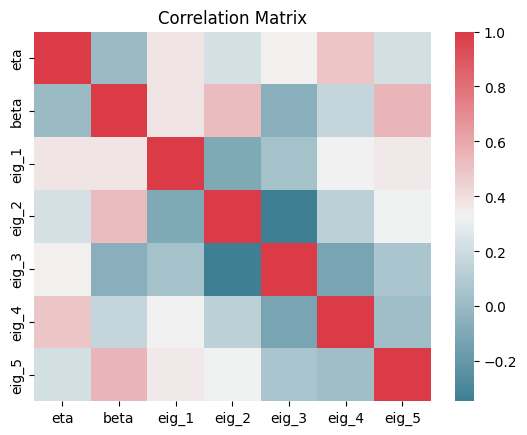

In [13]:
sns.heatmap(corr_mat, cmap=sns.diverging_palette(220, 10, as_cmap=True))
plt.title("Correlation Matrix")

In [14]:
torch.cuda.get_device_properties(torch.device("cuda"))

_CudaDeviceProperties(name='AMD Radeon RX 6600M', major=10, minor=3, gcnArchName='gfx1030', total_memory=8176MB, multi_processor_count=14, uuid=58580000-0000-0000-0000-000000000000, L2_cache_size=2MB)

In [15]:
n_pow = 20
def custom_activation(x):
    return (1/n_pow) * torch.log((1 + torch.exp(n_pow * x)) / (1 + torch.exp(n_pow * (x - 1))))
#fin función

# Wrap the function in a Keras custom layer
@keras.saving.register_keras_serializable()
class CustomActivationLayer(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CustomActivationLayer, self).__init__(**kwargs)
    
    def call(self, inputs):
        # Ensure inputs are Torch tensors
        inputs = torch.tensor(inputs) if not isinstance(inputs, torch.Tensor) else inputs
        return custom_activation(inputs)
    #fin función
#fin clase

In [16]:
modelo = keras.models.load_model(path_to_current_model)

In [17]:
mets_train = data_processors.get_metrics(X_train, y_train, modelo)
mets_val = data_processors.get_metrics(X_rand5, y_rand5, modelo)
mets_rand1 = data_processors.get_metrics(X_rand1, y_rand1, modelo)

  28/4688 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step     

/home/cubos/.local/lib/python3.13/site-packages/keras/src/backend/torch/numpy.py:114: UserWarning: Attempting to use hipBLASLt on an unsupported architecture! Overriding blas backend to hipblas (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:328.)
  return cast(torch.matmul(x1, x2), result_dtype)


4688/4688 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [18]:
print("Train: ", mets_train)
print("Val: ", mets_val)
print("Test: ", mets_rand1)

Train:  {'R2': 0.9820635537864484, 'RMSE': 0.03869083259164244, 'MAE': 0.024386691208298113, 'SDAE': np.float64(0.030037806486919384)}
Val:  {'R2': 0.9811448795306766, 'RMSE': 0.039737334747236015, 'MAE': 0.02458649252260821, 'SDAE': np.float64(0.03121794609274642)}
Test:  {'R2': 0.9804559371169285, 'RMSE': 0.040276298261771884, 'MAE': 0.02370680152727149, 'SDAE': np.float64(0.0325602174903327)}


In [19]:
mets_combi = data_processors.get_metrics(X_combi, y_combi, modelo)

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [20]:
print("Mis datos combinatoriales: ", mets_combi)

Mis datos combinatoriales:  {'R2': 0.9867481740314671, 'RMSE': 0.033188830377180296, 'MAE': 0.022560716374172913, 'SDAE': np.float64(0.024341580443540886)}


In [99]:
def graficar_lambdas(data_frame, target, n_eig, preds = {}, op = lambda x: x, nombre = "lineal/", nombre_feat = r"$\xi_n$"):
    cols_eig = list(map(lambda x: "eig_" + str(x + 1), range(n_eig)))
    cols_eig_label = list(map(lambda x: r"$\xi_{%d}$"%x, range(n_eig)))
    cols_preds = list(map(lambda x: "pred_" + x, cols_eig)) if len(preds) != 0 else []
    cols_preds_label = list(map(lambda x: r"$\xi_{%d}^{predicted}$"%x, range(n_eig))) if len(preds) != 0 else []
    #eta = str(np.array(data_frame["eta"])[0]/np.pi)[:4] + r"\pi"
    #beta = str(np.array(data_frame["beta"])[0]/np.pi)[:4] + r"\pi"
    eta = np.array(data_frame["eta"])[0]/np.pi
    beta = np.array(data_frame["beta"])[0]/np.pi
    x = data_frame[target]
    ys = op(data_frame[cols_eig])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(x, ys)
    if len(preds) != 0:
        ax.plot(preds["y"], ys)
        nombre = "pred/" + nombre
    #fin if 
    ax.set_xlabel(r"$\varphi_K$")
    ax.set_ylabel(nombre_feat)
    ax.set_title(r"$\eta = {%.2f}\pi, \beta = {%.2f}\pi$"%(eta, beta))
    ax.legend(cols_eig_label + cols_preds_label)
    plt.savefig("pictures/" + nombre + "eta=" +  str(eta)[:4] + ",beta=" + str(beta)[:4] + "_" + ".png")
    plt.close()
#fin for 

In [100]:
def graficar_todas(d_frame, n_eig, target, op = lambda x: x, preds = {}, nombre = "nn_7/", nombre_feat = r"$\xi_n$"):
    for n in range(N_partes):
        start = N_phi_K*n
        end = N_phi_K*(n+1)
        ys = preds["y"][start:end] if len(preds) != 0 else []
        preds_fin = {"y": ys, "X": preds["X"].iloc[start:end]} if len(preds) != 0 else {}
        graficar_lambdas(d_frame.iloc[start:end], target, n_eig, preds_fin, op, nombre, nombre_feat)
    #fin for 
#fin función

In [101]:
y_pred_combi = modelo.predict(X_combi)

1641/1641 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [102]:
graficar_todas(datos_combi, N_eig, target, preds = {"y": y_pred_combi, "X": X_combi})

In [103]:
graficar_todas(datos_combi, N_eig, target, nombre = "raw/")